In [1]:
!git clone -b v6.2 https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 15300, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15300 (delta 4), reused 2 (delta 0), pack-reused 15287
Receiving objects: 100% (15300/15300), 14.14 MiB | 15.06 MiB/s, done.
Resolving deltas: 100% (10494/10494), done.
Note: switching to 'd3ea0df8b9f923685ce5f2555c303b8eddbf83fd'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false



In [2]:
!pip install -r /kaggle/working/yolov5/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.4 MB/s eta 0:00:0000:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 21.12.2 requires cupy-cuda115, which is not installed.
tfx-bsl 1.12.0 requires google-api-python-client<2,>=1.7.11, but you have google-api-python-client 2.79.0 which is incompatible.
tfx-bsl 1.12.0 requires pyarrow<7,>=6, but you have pyarrow 5.0.0 which is incompatible.
tensorflow 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.1 which is incompatible.
tensorflow-transform 1.12.0 requires pyarrow<7,>=6, but you have pyarrow 5.0.0 which is incompatible.
tensorflow-serving-api 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.1 which

In [3]:
import torch 
import os
from IPython.display import Image, clear_output

In [4]:
os.environ["DATASET_DIRECTORY"] = "/kaggle/working/datasets"

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="kGWq6U2fHcN42KyOdlF8")
project = rf.workspace("aivietnam").project("lvtn-q4rco")
dataset = project.version(11).download("yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 14.8 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=232cf4cb9353115f8640436c689b287a550e6978fe4c8da9c8ebf0514348c3a2
  Stored in directory: /root/.cache/pip/wheels/e1/e8/db/ebe4dcd7d7d11208c1e4e4ef246cea4fcc8d463c93405a6555
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
      Successfully uni

Extracting Dataset Version Zip to /kaggle/working/datasets/LVTN-11 in yolov5pytorch:: 100%|██████████| 1872/1872 [00:00<00:00, 1963.59it/s]


In [7]:
%cd /kaggle/working/yolov5

/kaggle/working/yolov5


In [8]:
!python train.py --img 640 --batch 80 --epochs 200 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=, data=/kaggle/working/datasets/LVTN-11/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=80, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 387 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.2-0-gd3ea0df Python-3.7.12 torch-1.13.0 CUDA

In [9]:
import shutil
shutil.make_archive("/kaggle/working/weights__", "zip", "/kaggle/working/yolov5/runs/train/exp")

'/kaggle/working/weights__.zip'

In [12]:
%cd /kaggle/working/datasets/LVTN-11/test/images
%ls

/kaggle/working/datasets/LVTN-11/test/images
CDY_2025_jpg.rf.708291b04d8a46d7b526e03a7e01d2fa.jpg
CDY_2036_jpg.rf.7f838c79000662400043b9fe4a739805.jpg
CDY_2055_jpg.rf.3527b33cc97aba58f7c0dfce0319a5f2.jpg
CSV_20180427_144723166_HDR_jpg.rf.c2cf2fe5887fe051a5ba85a881e99c85.jpg
SVB_1968_jpg.rf.8654b0a6f5c1567570828b8b4662ce84.jpg


## ***Prediction***

In [14]:
%cd /kaggle/working/yolov5
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.2 --source /kaggle/working/datasets/LVTN-11/test/images

/kaggle/working/yolov5
detect: weights=['runs/train/exp/weights/best.pt'], source=/kaggle/working/datasets/LVTN-11/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.2-0-gd3ea0df Python-3.7.12 torch-1.13.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/5 /kaggle/working/datasets/LVTN-11/test/images/CDY_2025_jpg.rf.708291b04d8a46d7b526e03a7e01d2fa.jpg: 640x640 16 0s, Done. (0.007s)
image 2/5 /kaggle/working/datasets/LVTN-11/test/images/CDY_2036_jpg.rf.7f838c79000662400043b9fe4a739805.jpg: 640x640 13 0s, Done. (0.008s)
image 3/5 /kaggle/working/datas

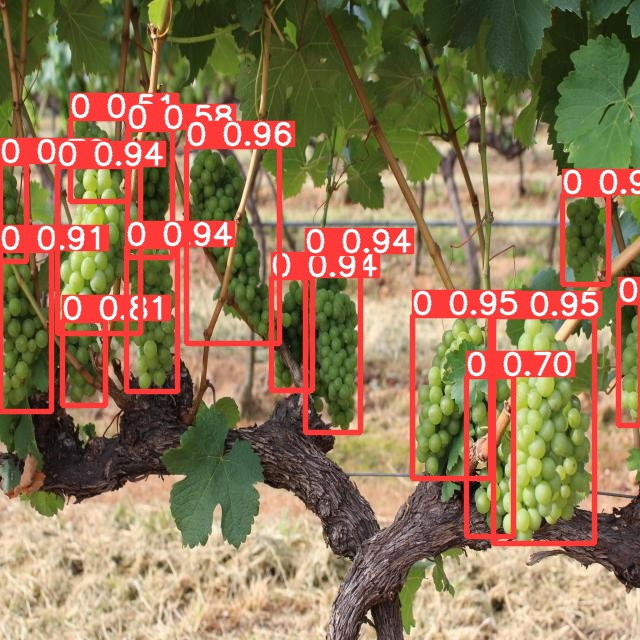

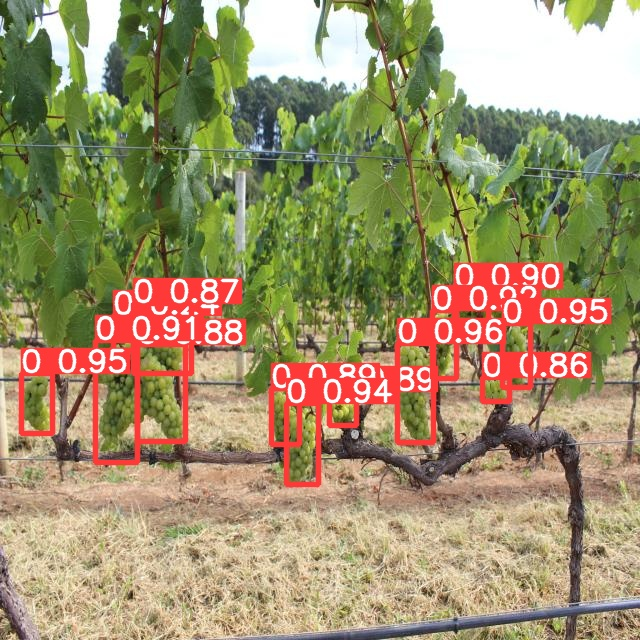

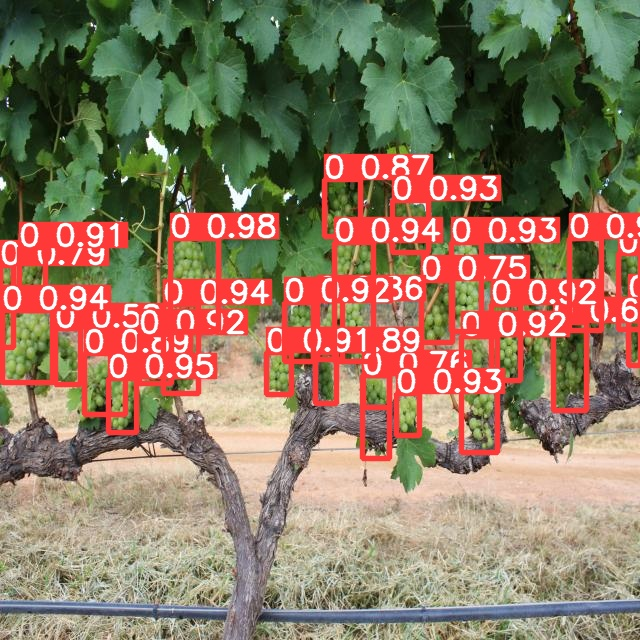

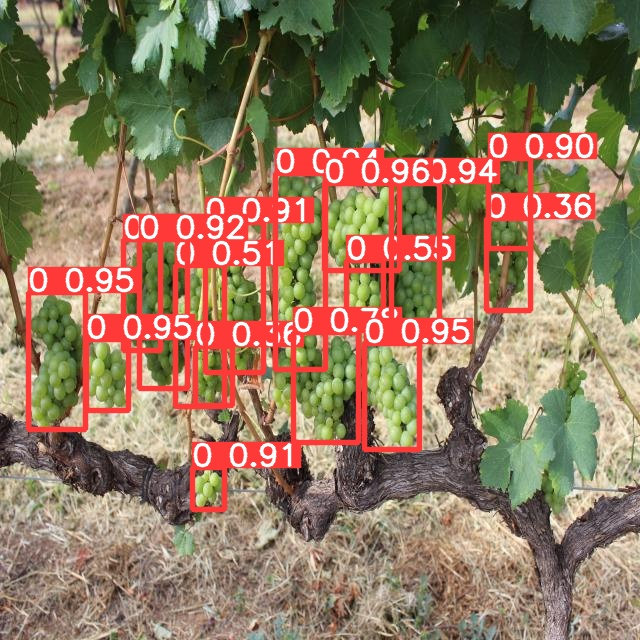

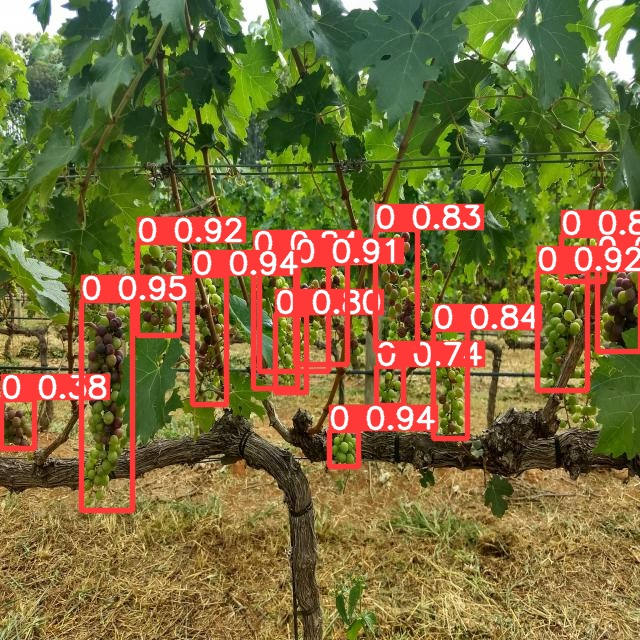

In [15]:
import glob
from IPython.display import Image, display

i = 0
for imgName in glob.glob("/kaggle/working/yolov5/runs/detect/exp2/*.jpg"):
    i += 1
    if i < 10:
        display(Image(filename=imgName))
        print("\n")
        

In [1]:
%ls /kaggle/working/

__notebook_source__.ipynb
